In [12]:
# !pip install pandas
# !python -m pip install --upgrade pip
# !pip install xlrd
# !pip install sklearn
# !pip install openpyxl
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn 

In [13]:
import pandas as pd
import xlrd

# 데이터 준비

In [14]:

df = pd.read_excel('./goms_filtered_re.xlsx',engine='openpyxl')
df = df.fillna(0)
df

,schoolType,schoolType_str,major,graduY,age,internExp,toeicScore,tospGrade,trainingHr,jobseekYN,certNum,mainJobCate,mainJobCate_str,midJobCate,midJobCate_str,subJobCate,subJobCate_str
0,1,2~3년제,비즈니스일본어과,2018,23.500000,0.0,0.0,0.0,0.0,1,0.0,6.0,미용·여행·숙박·음식·경비·청소직,54.0,경호·경비직,541.0,경호·보안 종사자
1,1,2~3년제,일본어과,2018,21.750000,0.0,0.0,0.0,240.0,1,0.0,0.0,0,0.0,0,0.0,0
2,1,2~3년제,일본어과,2018,21.916667,0.0,800.0,0.0,0.0,0,1.0,3.0,교육·법률·사회복지·경찰·소방직 및 군인,21.0,교육직,214.0,문리·기술·예능 강사
3,1,2~3년제,관광일어과,2018,25.583333,0.0,0.0,0.0,0.0,0,0.0,6.0,미용·여행·숙박·음식·경비·청소직,52.0,여행·숙박·오락 서비스직,522.0,항공기·선박·열차 객실승무원
4,1,2~3년제,관광일어과,2018,21.750000,0.0,0.0,0.0,0.0,1,1.0,7.0,영업·판매·운전·운송직,61.0,영업·판매직,615.0,판매 종사자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18158,2,4년제,뮤지컬전공,2017,27.333333,0.0,0.0,0.0,0.0,1,0.0,0.0,0,0.0,0,0.0,0
18159,2,4년제,교회음악학과,2018,25.083333,0.0,0.0,0.0,0.0,0,0.0,3.0,교육·법률·사회복지·경찰·소방직 및 군인,21.0,교육직,214.0,문리·기술·예능 강사
18160,2,4년제,교회음악과,2018,26.750000,0.0,0.0,0.0,0.0,0,0.0,7.0,영업·판매·운전·운송직,61.0,영업·판매직,612.0,영업원 및 상품중개인
18161,1,2~3년제,유아교육학과,2018,28.583333,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18163 entries, 0 to 18162
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   schoolType       18163 non-null  int64  
 1   schoolType_str   18163 non-null  object 
 2   major            18163 non-null  object 
 3   graduY           18163 non-null  int64  
 4   age              18163 non-null  float64
 5   internExp        18163 non-null  float64
 6   toeicScore       18163 non-null  float64
 7   tospGrade        18163 non-null  float64
 8   trainingHr       18163 non-null  float64
 9   jobseekYN        18163 non-null  int64  
 10  certNum          18163 non-null  float64
 11  mainJobCate      18163 non-null  float64
 12  mainJobCate_str  18163 non-null  object 
 13  midJobCate       18163 non-null  float64
 14  midJobCate_str   18163 non-null  object 
 15  subJobCate       18163 non-null  float64
 16  subJobCate_str   18163 non-null  object 
dtypes: float64(9

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# 숫자 값으로 변환하기 위해 LabelEncoder로 먼저 변환한다.
encoder = LabelEncoder()
encoder.fit(df['major'])
majorCode = encoder.transform(df['major'])
majorCode

# 2차원 데이터로 변환하기
df['majorCode'] = majorCode.reshape(-1,1)
df


,schoolType,schoolType_str,major,graduY,age,internExp,toeicScore,tospGrade,trainingHr,jobseekYN,certNum,mainJobCate,mainJobCate_str,midJobCate,midJobCate_str,subJobCate,subJobCate_str,majorCode
0,1,2~3년제,비즈니스일본어과,2018,23.500000,0.0,0.0,0.0,0.0,1,0.0,6.0,미용·여행·숙박·음식·경비·청소직,54.0,경호·경비직,541.0,경호·보안 종사자,1278
1,1,2~3년제,일본어과,2018,21.750000,0.0,0.0,0.0,240.0,1,0.0,0.0,0,0.0,0,0.0,0,2344
2,1,2~3년제,일본어과,2018,21.916667,0.0,800.0,0.0,0.0,0,1.0,3.0,교육·법률·사회복지·경찰·소방직 및 군인,21.0,교육직,214.0,문리·기술·예능 강사,2344
3,1,2~3년제,관광일어과,2018,25.583333,0.0,0.0,0.0,0.0,0,0.0,6.0,미용·여행·숙박·음식·경비·청소직,52.0,여행·숙박·오락 서비스직,522.0,항공기·선박·열차 객실승무원,360
4,1,2~3년제,관광일어과,2018,21.750000,0.0,0.0,0.0,0.0,1,1.0,7.0,영업·판매·운전·운송직,61.0,영업·판매직,615.0,판매 종사자,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18158,2,4년제,뮤지컬전공,2017,27.333333,0.0,0.0,0.0,0.0,1,0.0,0.0,0,0.0,0,0.0,0,1005
18159,2,4년제,교회음악학과,2018,25.083333,0.0,0.0,0.0,0.0,0,0.0,3.0,교육·법률·사회복지·경찰·소방직 및 군인,21.0,교육직,214.0,문리·기술·예능 강사,413
18160,2,4년제,교회음악과,2018,26.750000,0.0,0.0,0.0,0.0,0,0.0,7.0,영업·판매·운전·운송직,61.0,영업·판매직,612.0,영업원 및 상품중개인,412
18161,1,2~3년제,유아교육학과,2018,28.583333,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,2139


In [17]:
ndf = df[['majorCode','toeicScore','age','mainJobCate']]
ndf

,majorCode,toeicScore,age,mainJobCate
0,1278,0.0,23.500000,6.0
1,2344,0.0,21.750000,0.0
2,2344,800.0,21.916667,3.0
3,360,0.0,25.583333,6.0
4,360,0.0,21.750000,7.0
...,...,...,...,...
18158,1005,0.0,27.333333,0.0
18159,413,0.0,25.083333,3.0
18160,412,0.0,26.750000,7.0
18161,2139,0.0,28.583333,0.0


# linearRegression

In [18]:
X = ndf[['toeicScore']]
y = ndf['mainJobCate']
X,y

(       toeicScore
 0             0.0
 1             0.0
 2           800.0
 3             0.0
 4             0.0
 ...           ...
 18158         0.0
 18159         0.0
 18160         0.0
 18161         0.0
 18162         0.0
 
 [18163 rows x 1 columns],
 0        6.0
 1        0.0
 2        3.0
 3        6.0
 4        7.0
         ... 
 18158    0.0
 18159    3.0
 18160    7.0
 18161    0.0
 18162    3.0
 Name: mainJobCate, Length: 18163, dtype: float64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)
print('\n')

훈련 데이터:  (12714, 1)
검증 데이터:  (5449, 1)




In [20]:
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

0.011437411086260285


기울기 a:  [-0.00081499]


y절편 b 2.6720848192836346




       toeicScore
0             0.0
1             0.0
2           800.0
3             0.0
4             0.0
...           ...
18158         0.0
18159         0.0
18160         0.0
18161         0.0
18162         0.0

[18163 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


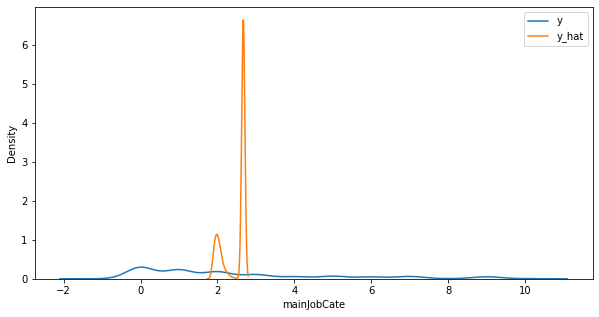

In [21]:
print(X);
y_hat = lr.predict(X)
print(type(X))


# result = lr.predict(pd.DataFrame({'weight':[2678]}))
# print(result)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

# RandomForest